<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 900px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "public_html\_data\fig\buildingdamage.svg"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        IJsselsteinseweg 77 - Study
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building IJsselsteinseweg 77 in Nieuwegein in the Netherlands, a deatched 2-layer unreinforced masonry structure from 1961 with 2 floors and a cellar which was eventually demolished circa 2015. We can evaluate the state of damage before its demolishing due to a Foundation research report that was commissioned by the owner to Sandra Lobbe Ispectie & Advies, a building consulting firm who carried out the building and foundation investigation on June 2019 and thereafter produced a report documenting the buildings measurements, characteristics, damage state and their own assessment on the necessary course of action or risk of the building integrity due to subsidence effects. The main assessment found that the current capacity provided by the building’s foundation was Insufficient and given the experienced deformations by the building and the damage state of the building, countermeasures should be implemented in a period of 1-5 years following the assessment date. 
</p>

## <strong> X | Imports</strong>

In [1]:
from convergence import convergence_analysis

import numpy as np
import matplotlib.pyplot as plt

## <strong> 1 | Structure dimensions and measurements</strong>

In [2]:
walls = {
    'Wall 1':{"x": np.array([0, 0, 0]), "y": np.array([0, 3.5, 7]), "z": np.array([0, -72, -152]), 'phi': np.array([1/200,1/200]), 'height': 5250, 'thickness': 27,'area': 390600},
    'Wall 2':{"x": np.array([0, 4.5, 8.9]), "y": np.array([7, 7, 7]), "z": np.array([-152, -163, -188]),  'phi': np.array([1/33,1/50]), 'height': 5250, 'thickness': 27,'area': 464625},
    'Wall 3':{"x": np.array([8.9, 8.9]), "y": np.array([3.6, 7]), "z": np.array([-149, -188]), 'phi': np.array([0,0]), 'height': 5250, 'thickness': 27,'area': 166950},
    'Wall 4':{"x": np.array([8.9, 10.8]), "y": np.array([3.6, 3.6]), "z": np.array([-149,-138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 49020},
    'Wall 5':{"x": np.array([10.8, 10.8]), "y": np.array([0, 3.6]), "z": np.array([-104, -138]), 'phi': np.array([1/77,1/67]), 'height': 2850, 'thickness': 27,'area': 96720},
    'Wall 6':{"x": np.array([0, 5.2, 6.4, 8.9, 10.8]), "y": np.array([0, 0, 0, 0, 0]), "z": np.array([0, -42, -55, -75, -104]), 'phi': np.array([1/100,1/100]), 'height': 5000, 'thickness': 27, 'area': 517980},
}

## <strong> 2 | Subsidence aplication method study</strong>

In [10]:
def process(coords, abs_disp, max_rate, rate_multiple):
    coords = coords - min(coords)
    rel_disp = np.insert(np.diff(abs_disp),0,0)

    rel_iter = find_iter(rel_disp, max_rate, rate_multiple)
    abs_iter = find_iter(abs_disp, max_rate, rate_multiple)
    print(rel_iter, abs_iter)
    dydt_abs = abs_disp//abs_iter
    dydt_rel = rel_disp//rel_iter

    dydx_abs = np.gradient(dydt_abs,coords)
    dydx_rel = np.gradient(dydt_rel,coords)
    
    return dydx_abs/dydx_rel

def find_iter(abs_disp, max_rate, rate_multiple = False):
    """
    Calculates the number of iterations based on the absolute displacement, maximum rate, and rate multiple.

    Parameters:
    abs_disp (list): A list of absolute displacements.
    max_rate (float): The maximum rate.
    rate_multiple (float): The rate multiple.

    Returns:
    int: The number of iterations.

    """
    iter = max(abs(abs_disp)) // max_rate
    if rate_multiple:
        iter = iter + rate_multiple - iter % rate_multiple
    return iter

In [12]:
x = walls['Wall 2']['x']
z = walls['Wall 2']['z']
dz = np.insert(np.diff(z),0,0)

iter = find_iter(dz,max_rate=0.05)
iter

499.0

80 152
[ 1.  1. nan]


C:\Users\javie\AppData\Local\Temp\ipykernel_22304\3333648060.py:14: RuntimeWarning: invalid value encountered in divide
  return dydx_abs/dydx_rel


25 188
[-0.00000000e+00  2.52638819e-16             nan]
39 188
[-0. -0.]
11 149
[0. 0.]
34 138
[-0. -0.]
42 104
[ 1.  1.  1.  1. nan]


NameError: name 'titles' is not defined

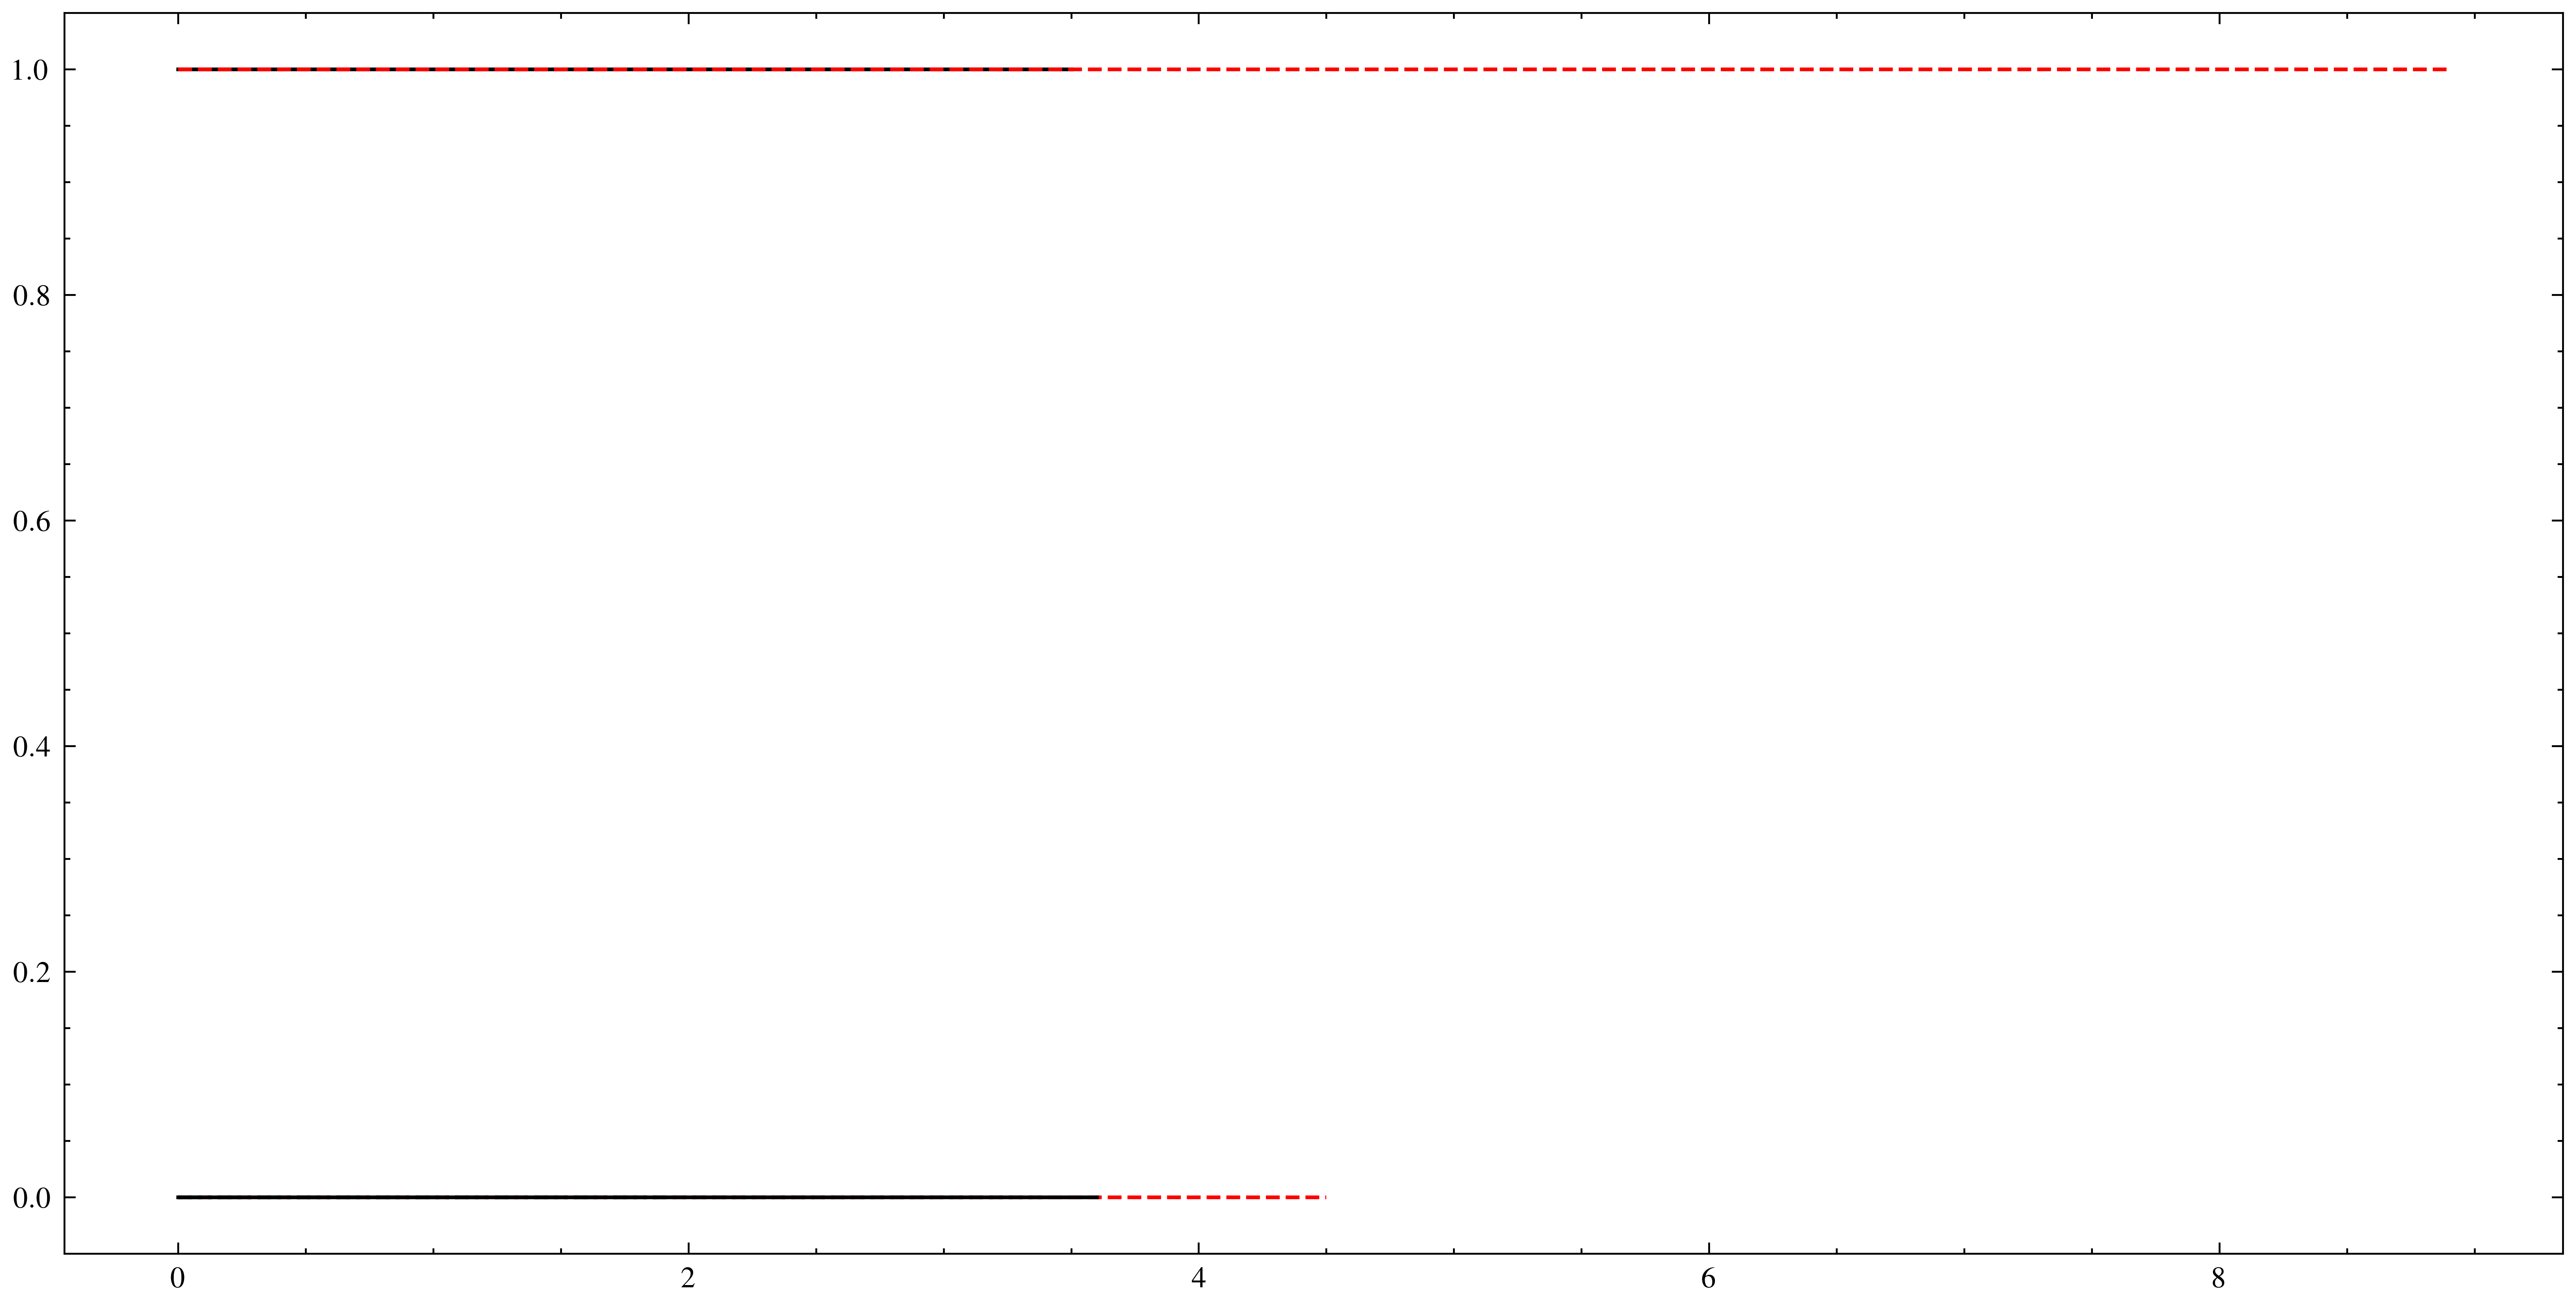

In [ ]:
# Number of years 2019-1963 -> 56 years
max_rate = 1
rate_multiple = 56
fig = plt.figure(figsize=(12, 6))  # Changed to horizontal layout

for i, wall in enumerate(walls.keys()):
    if i % 2 == 0:
        coords = walls[wall]['y']
    else:
        coords = walls[wall]['x']
    abs_disp = walls[wall]['z']

    coords = coords - min(coords)
    rat = process(coords, abs_disp, max_rate, rate_multiple)
    print(rat)
    plt.plot(coords, rat, label=f'{wall}')  # Gradient of relative settlements -> Relative underestimates the settlement rate

plt.title(titles[0])
plt.xlabel('Relative Length [m]')
plt.ylabel('Absolute/Relative Settlement Rate')

plt.legend()
plt.tight_layout()
plt.show()


## <strong> 3 | Process runs</strong>

In [ ]:




figures = convergence_analysis(multiple = True)

In [ ]:
def save_analysis_results(directory, filename):
    # Perform the analysis
    figures = convergence_analysis(filename)

    # Create a new directory called 'analysis' in the current directory if not exists
    analysis_dir = os.path.join(directory, 'analysis')
    os.makedirs(analysis_dir, exist_ok=True)

    # Save the figures in the 'analysis' directory
    for i, fig in enumerate(figures, start=1):
        fig_path = os.path.join(analysis_dir, f'Convergence_figure_{i}.png')
        if os.path.exists(fig_path):
            os.remove(fig_path)  # remove the file if it already exists
        fig.savefig(fig_path)

    # Save some information in a txt file in the 'analysis' directory
    info_path = os.path.join(analysis_dir, 'info.txt')
    if os.path.exists(info_path):
        os.remove(info_path)  # remove the file if it already exists
    with open(info_path, 'w') as f:
        model_info = 
        f.write(model_info)

def main(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.OUT'):
                save_analysis_results(root, os.path.join(root, file))

